# A Personalized Outfit Suggestion Tool

## Description

This tool utilizes the database obtained from DataFromApi.py to randomly select a digital wardrobe to represent the clothes that the user owns, and make suggestions on what to wear by considering the occasion and the weather.

## Methodology

This tool categorizes products by occasion, climate and their types using pre-defined dictionaries. Then, based on the definition of the products, randomly selects an outfit that fit the criteria provided by the user, then displays the outfit with the images downloaded from the webpage. If the user does not have an outfit suitable for that criteria in their digital wardrobe, this tool recommends a product for the user to buy, and provides links.

## Sample Input and Output

### Digital Wardrobe

Digital wardrobe is randomly selected as a subset of the database for now, but eventually the goal is to take input from the user.

<img src="SampleOutput1.png">

### Depending on the weather

In [1]:
# Neccessary import for displaying images side by side
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='SampleOutput9.png'></td><td><img src='SampleOutput3.png'></td><td><img src='SampleOutput4.png'></td></tr></table>"))

,,


### Depending on the occasion

In [2]:
display(HTML("<table><tr><td><img src='SampleOutput5.png'></td><td><img src='SampleOutput6.png'></td><td><img src='SampleOutput7.png'></td></tr></table>"))

,,


### Recommendation system
<img src="SampleOutput8.png">

## What's next?
-  Obtain more data through scraping and using available APIs.
-  Research neural network algorithms for smart suggestions.
    -  Possibly word2vec algorithm
-  Add price based suggestions.
-  Obtain realtime weather forecast from an API.
-  Add location data for packing for travel suggestions.
-  Implement a user feedback option.
-  Calculate the frequency of the outpits picked by the user to add sentimental value to them, and increase their weight on probability based suggestions.

## How to use this tool?
Input the weather (In[15]) and the occasion (In[16]) to obtain the results.

## The script used to generate the results above

In [3]:
# Required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

### Functions

In [4]:
def addType(arr,torso,legs,accesories):
    '''
    Adds a new column to the data frame
    
    Parameters
    ----------
    arr : Data frame to modify
        Add a type column which shows the type of clothing.
    torso : List of clothes.
    legs : List of clothes.
    accesories : List of clothes.

    Returns
    -------
    arr : Modified data frame.
    '''
    arr['Type']="NA"
    # Iterate over clothing items obtained from database to find their types
    for ind, val in arr['ProductName'].iteritems():
        name_list = val.split()
        for name in name_list:
            if name in torso:
                arr.loc[ind,'Type'] = name
            elif name in legs:
                arr.loc[ind,'Type'] = name
            elif name in accesories:
                arr.loc[ind,'Type'] = name  
    return arr

In [5]:
def addProperty(arr,col,prop,arr1,arr_name1,arr2,arr_name2,arr3,arr_name3):
    
    '''
    Adds a new column to the data frame
    
    Parameters
    ----------
    arr : Data frame to modify
        Add a type column which shows the type of clothing.
    col : Name of the column to do the parsing.
    arr1-2-3 : List of properties.
    arr_name1-2-3 : Name of the properties.

    Returns
    -------
    arr : Modified data frame.

    To-do
    -------
    Change arr and arr_name variables to *args
    '''
    arr[prop]="NA"
    # Iterate over clothing items obtained from database to categorize by their properties
    for ind, val in arr[col].iteritems():
        name_list = val.split()
        for name in name_list:
            if name in arr1:
                arr.loc[ind,prop] = arr_name1
            elif name in arr2:
                arr.loc[ind,prop] = arr_name2
            elif name in arr3:
                arr.loc[ind,prop] = arr_name3 
    return arr

### Main Program

In [6]:
# Read in data from csv files
all_clothes = pd.read_csv("hm_men_all_stock_H%26M MAN_us_en_0_500.csv")

In [7]:
# Look at unique name identifiers in product name
nameIdentifiers = []
for c in all_clothes['ProductName']:
    nameIdentifiers.extend(c.split())

In [8]:
# Using the unique name identifiers, categorize the cloth types
# Categorize by function
torso = ["Top","T-shirt","Shirts","Shirt","Sweatshirt","Hoodie","Cardigan","Jacket","Coat","Parka","Blazer","Vest","Sweater","Shacket"]
legs =["Shorts","Joggers","Pants","Chinos","Chino","Tights","Cargo","Jeans"]
accesories = ["Hat","Cap"]

# Categorize by climate
hot = ["Top","T-shirt","Shorts"]
warm = ["Shirts","Shirt","Sweatshirt","Cardigan","Jacket","Blazer","Vest","Shacket","Chinos","Chino","Tights","Cargo"]
cold =["Hoodie","Joggers","Pants","Jeans","Sweater","Coat","Parka"]

# Categorize by occasion
business = ["Pants","Shirts","Shirt","Jacket","Blazer","Coat"]
casual = ["Cardigan","Vest","Shacket","Chinos","Chino","Cargo","Jeans","Sweater","Parka","Top","T-shirt","Shorts"]
sporty =["Hoodie","Joggers","Sweatshirt","Tights"]

In [9]:
# Add types and properties to the data frame
all_clothes = addType(all_clothes,torso,legs,accesories)

all_clothes = addProperty(all_clothes,'ProductName','Function',torso,"Torso",legs,"Legs",accesories,"Accesories")
all_clothes = addProperty(all_clothes,'ProductName','Climate',hot,"Hot",warm,"Warm",cold,"Cold")
all_clothes = addProperty(all_clothes,'ProductName','Occasion',business,"Business",casual,"Casual",sporty,"Sporty")

In [10]:
# Items in user's wardrobe by type
# Define a seed
# np.random.seed(0)
business_clothes = all_clothes.loc[all_clothes['Occasion']=='Business',:]
casual_clothes = all_clothes.loc[all_clothes['Occasion']=='Casual',:]
sporty_clothes = all_clothes.loc[all_clothes['Occasion']=='Sporty',:]

In [11]:
# Select randomly from all clothes for now (235,109,14)
business_ind = np.random.choice(business_clothes.shape[0], 100, replace=False)
casual_ind = np.random.choice(casual_clothes.shape[0], 50, replace=False)
sporty_ind = np.random.choice(sporty_clothes.shape[0], 14, replace=False)

In [12]:
# Digital Wardrobe
clothes = pd.concat([business_clothes.iloc[business_ind],casual_clothes.iloc[casual_ind],sporty_clothes.iloc[sporty_ind]])

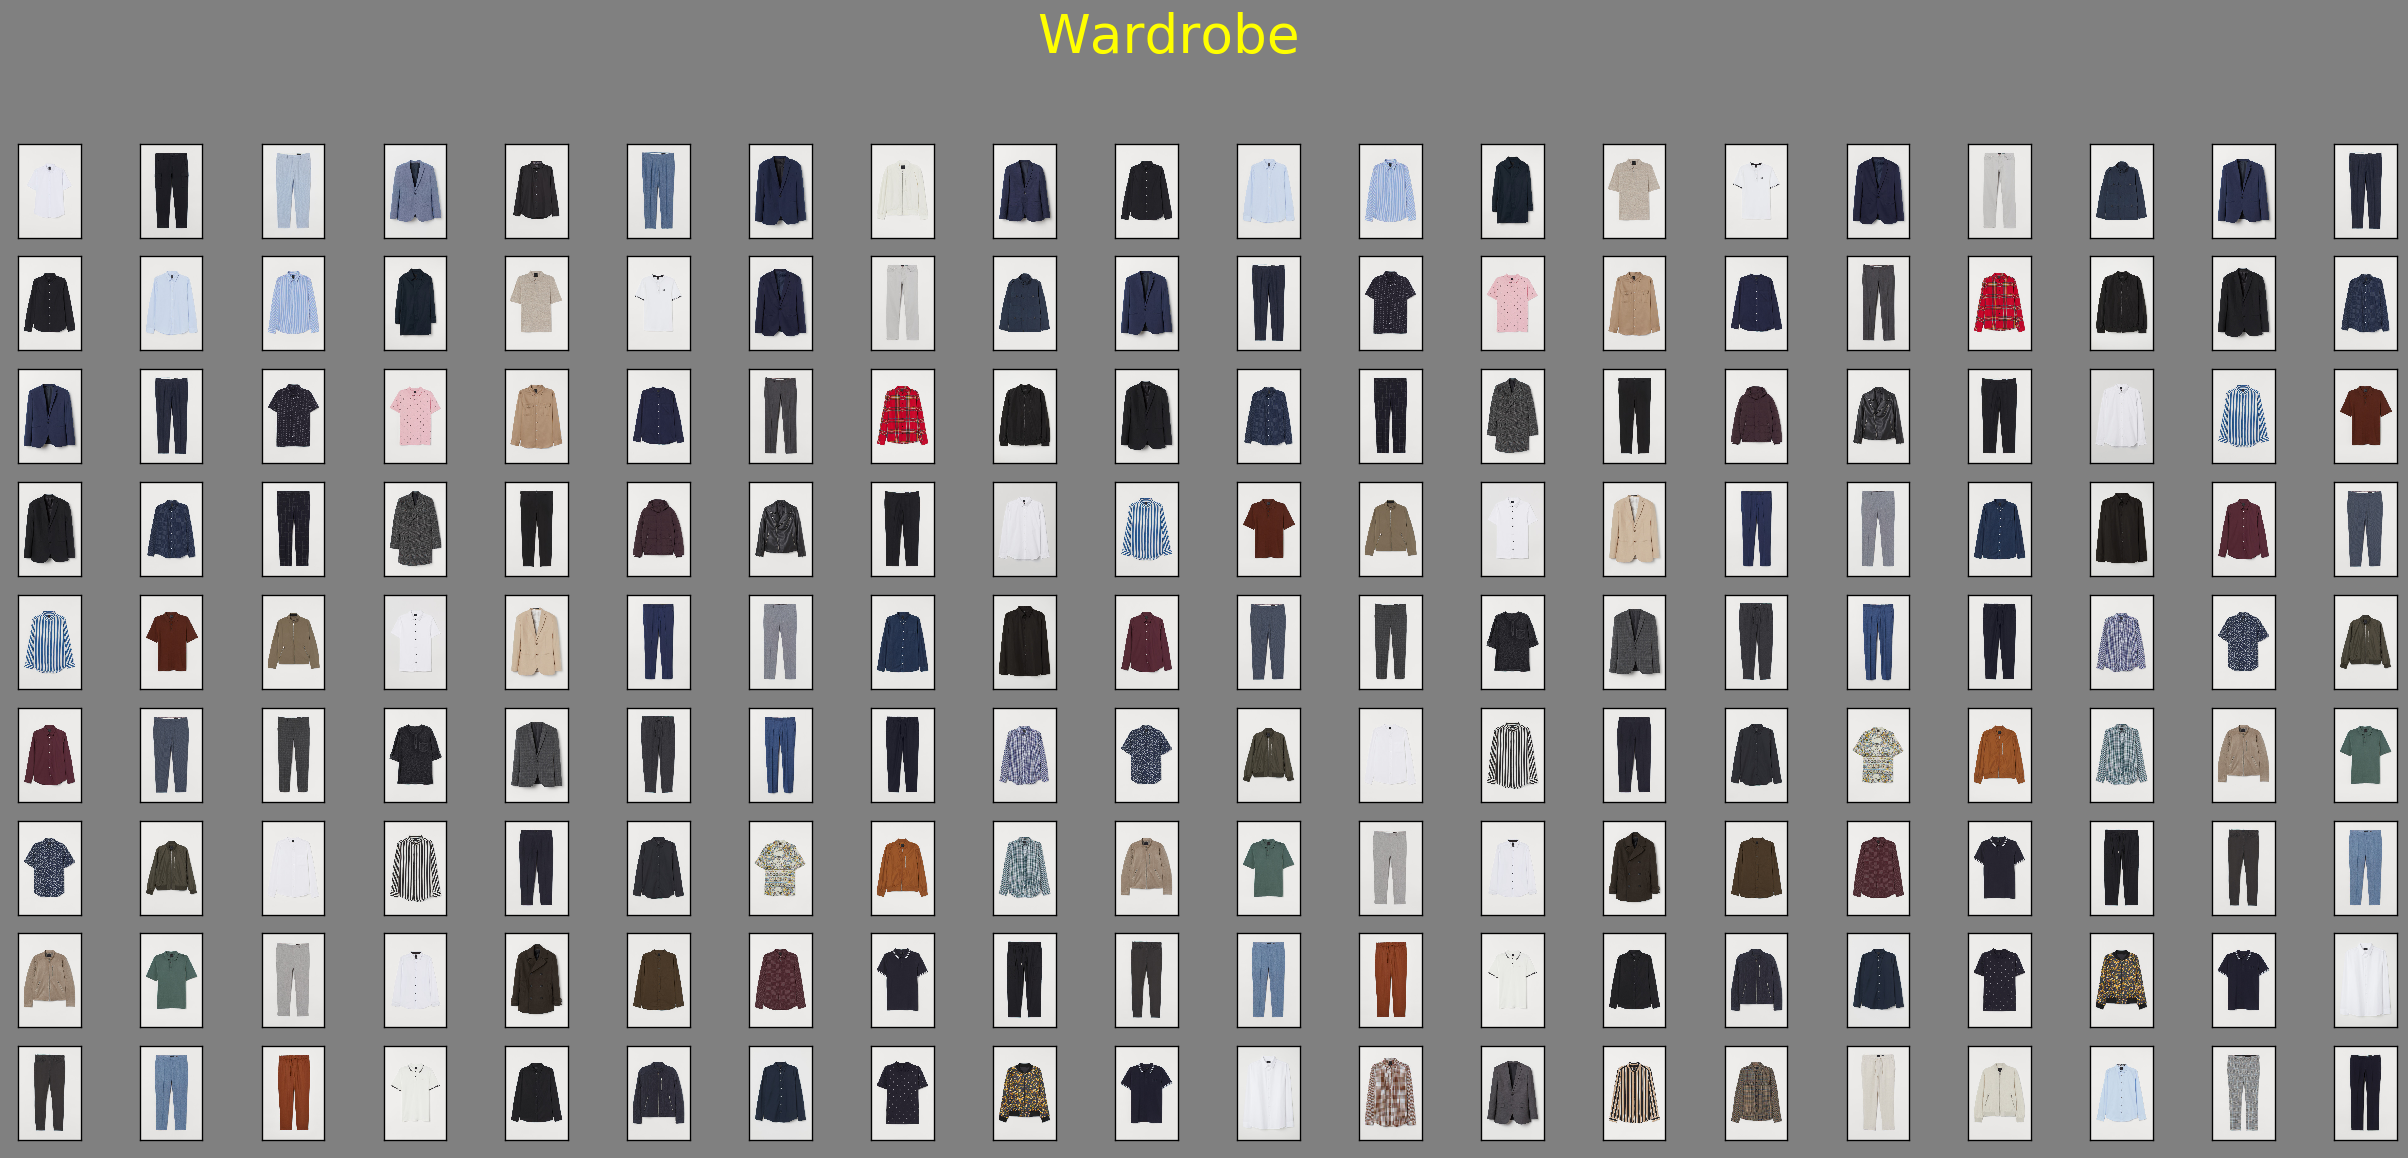

In [13]:
# The digital wardrobe figure
aspect_ratio = 1.5
columns = int(np.ceil(np.sqrt(clothes.shape[0])*aspect_ratio))
rows = int(np.ceil(np.sqrt(clothes.shape[0])/aspect_ratio))
fig, ax_array = plt.subplots(rows, columns, squeeze=False, figsize=(26,11), dpi=120, facecolor='gray', edgecolor='k')
fig.suptitle('Wardrobe', fontsize=32, color='yellow')
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        #axes.set_title('{},{}'.format(i,j))
        axes.get_xaxis().set_ticks([])
        axes.get_yaxis().set_ticks([])
        axes.get_xaxis().set_ticks([])
        axes.get_yaxis().set_ticks([])
        img = os.path.join(os.getcwd(),"0" + str(clothes.iloc[i*rows+j]['ProductID'])+".jpg")
        imgplot = axes.imshow(mpimg.imread(img))
plt.show()

In [14]:
# Sum of prices of all items
print("Total spent on business clothes: ",np.round(business_clothes['ProductPrice'].sum(),2),"USD")
print("Total spent on casual_clothes clothes: ",np.round(casual_clothes['ProductPrice'].sum(),2),"USD")
print("Total spent on sporty_clothes clothes: ",np.round(sporty_clothes['ProductPrice'].sum(),2),"USD")
print("Total spent on clothes: ", np.round(clothes['ProductPrice'].sum(),2),"USD\n")

# Average prices of all items
print("Average spent on business clothes: ",np.round(business_clothes['ProductPrice'].mean(),2),"USD")
print("Average spent on casual_clothes clothes: ",np.round(casual_clothes['ProductPrice'].mean(),2),"USD")
print("Average spent on sporty_clothes clothes: ",np.round(sporty_clothes['ProductPrice'].mean(),2),"USD")
print("Average spent on clothes: ",np.round(clothes['ProductPrice'].mean(),2),"USD")

Total spent on business clothes:  8093.68 USD
Total spent on casual_clothes clothes:  2713.93 USD
Total spent on sporty_clothes clothes:  457.86 USD
Total spent on clothes:  5148.37 USD

Average spent on business clothes:  34.44 USD
Average spent on casual_clothes clothes:  24.9 USD
Average spent on sporty_clothes clothes:  32.7 USD
Average spent on clothes:  31.39 USD


In [15]:
# Input the weather
while True:
    weather = input("Please enter the temperature in F : ")
    try:
        weather = int(weather)
        break
    except:
        print('Please enter a number.')

Please enter the temperature in F : 80


In [16]:
# Input the occasion
while True:
    occasion = input("What is the occasion (Business, Casual or Sporty) : ")
    if (occasion=="Business" or occasion=="Casual" or occasion=="Sporty"):
        break
    else:
        print('Please input in the right format.')

What is the occasion (Business, Casual or Sporty) : Casual


In [17]:
# Define hot, warm and cold weather
if(weather > 72):
    climate="Hot"
elif(55 < weather <= 72):
    climate="Warm"
else:
    climate="Cold"

In [18]:
# Divide data frame into types of clothes
torso_clothes = clothes.loc[clothes['Function']=='Torso',:]
legs_clothes = clothes.loc[clothes['Function']=='Legs',:]

In [19]:
# Create masks to filter the clothes data frame
mask_torso = (torso_clothes['Occasion']==occasion) & (torso_clothes['Climate']==climate)
mask_legs = (legs_clothes['Occasion']==occasion) & (legs_clothes['Climate']==climate)

---- Selected items ----
T-shirt with Motif : https://www2.hm.com/en_us/productpage.0649440048.html
Slim Fit Chino Shorts : https://www2.hm.com/en_us/productpage.0857448004.html


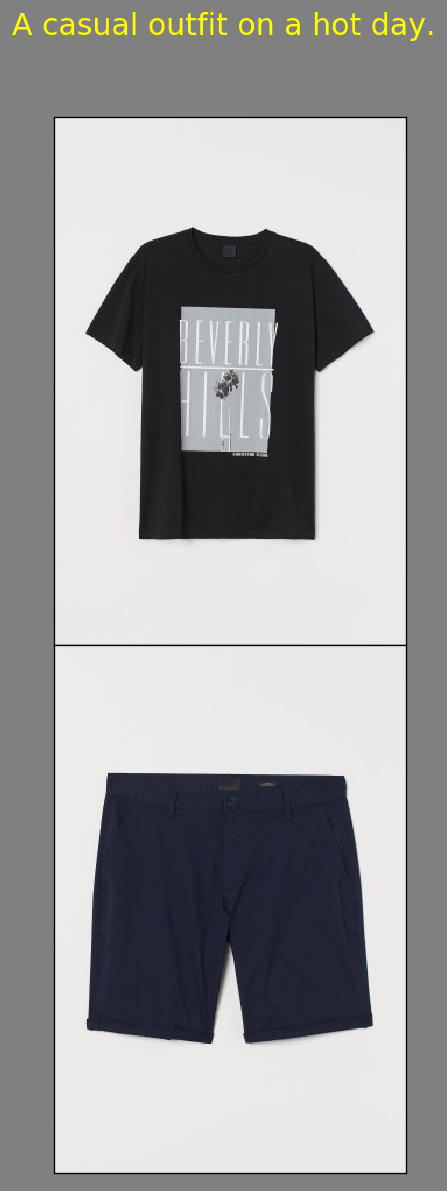

In [20]:
# If a suitable outfit not found, give recommendations
if(not (mask_torso.any() & mask_legs.any())):
    print("\nYou don't have a", occasion.lower(), "outfit suitable for", climate.lower(), "weather.\n")
    # Recommend an item that the user does not have
    # Filter the data frame and obtain two types of clothes from the clothes user does not have
    torso_filtered = torso_clothes.loc[np.invert(mask_torso),:]
    legs_filtered = legs_clothes.loc[np.invert(mask_legs),:]

    # Select items randomly
    torso_ind = np.random.choice(torso_filtered.shape[0])
    legs_ind = np.random.choice(legs_filtered.shape[0])

    # Obtain images
    img_1 = os.path.join(os.getcwd(),"0" + str(torso_filtered.iloc[torso_ind]['ProductID'])+".jpg")
    img_2 = os.path.join(os.getcwd(),"0" + str(legs_filtered.iloc[legs_ind]['ProductID'])+".jpg")
    
    # Print urls of the selected items
    print("---- Recommended items ----")
    print(torso_filtered.iloc[torso_ind]['ProductName'],":",(torso_filtered.iloc[torso_ind]['baseUrl']))
    print(legs_filtered.iloc[legs_ind]['ProductName'],":",(legs_filtered.iloc[legs_ind]['baseUrl']))
    
    # The recommendation figure
    fig2, (ax2,ax3) = plt.subplots(2,1, figsize=(4,11), dpi=120, facecolor='gray', edgecolor='k')
    fig2.suptitle("Recommended buy for a\n" + occasion.lower() + " outfit on a " + climate.lower() + " day.",fontsize=18,color='yellow')        
    # Adjust subplots
    fig2.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.0, hspace=0.0)

    # Plot images
    imgplot = ax2.imshow(mpimg.imread(img_1))
    imgplot2 = ax3.imshow(mpimg.imread(img_2))
    # Remove ticks
    ax2.axes.get_xaxis().set_ticks([])
    ax2.axes.get_yaxis().set_ticks([])
    ax3.axes.get_xaxis().set_ticks([])
    ax3.axes.get_yaxis().set_ticks([])
    plt.show()            
else:
    # Filter the data frame and obtain two types of clothes
    torso_filtered = torso_clothes.loc[mask_torso,:]
    legs_filtered = legs_clothes.loc[mask_legs,:]
    
    # Select items randomly
    torso_ind = np.random.choice(torso_filtered.shape[0])
    legs_ind = np.random.choice(legs_filtered.shape[0])

    # Obtain images
    img_1 = os.path.join(os.getcwd(),"0" + str(torso_filtered.iloc[torso_ind]['ProductID'])+".jpg")
    img_2 = os.path.join(os.getcwd(),"0" + str(legs_filtered.iloc[legs_ind]['ProductID'])+".jpg")
    
    # Print urls of the selected items
    print("---- Selected items ----")
    print(torso_filtered.iloc[torso_ind]['ProductName'],":",(torso_filtered.iloc[torso_ind]['baseUrl']))
    print(legs_filtered.iloc[legs_ind]['ProductName'],":",(legs_filtered.iloc[legs_ind]['baseUrl']))
    
    # The outfit figure
    fig2, (ax2,ax3) = plt.subplots(2,1, figsize=(4,11), dpi=120, facecolor='gray', edgecolor='k')
    fig2.suptitle("A " + occasion.lower() + " outfit on a " + climate.lower() + " day.",fontsize=18,color='yellow')
    # Adjust subplots
    fig2.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.0, hspace=0.0)
    # Plot images
    imgplot = ax2.imshow(mpimg.imread(img_1))
    imgplot2 = ax3.imshow(mpimg.imread(img_2))
    # Remove ticks
    ax2.axes.get_xaxis().set_ticks([])
    ax2.axes.get_yaxis().set_ticks([])
    ax3.axes.get_xaxis().set_ticks([])
    ax3.axes.get_yaxis().set_ticks([])
    plt.show()

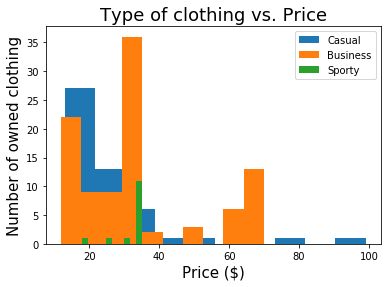

In [21]:
# Plot histograms to show the correlation between Number of clothing type owned vs. Price
fig1, ax1 = plt.subplots()
ax1.set_title('Type of clothing vs. Price',fontsize=18)
ax1.set_ylabel('Number of owned clothing',fontsize = 15)
ax1.set_xlabel('Price ($)',fontsize = 15)
line1 = plt.hist(np.asarray(clothes.loc[clothes['Occasion']=='Casual',:]['ProductPrice']), label='Casual')
line2 = plt.hist(np.asarray(clothes.loc[clothes['Occasion']=='Business',:]['ProductPrice']), label='Business')
line3 = plt.hist(np.asarray(clothes.loc[clothes['Occasion']=='Sporty',:]['ProductPrice']), label='Sporty')
ax1.legend()
plt.show()